<a href="https://colab.research.google.com/github/SanketBhadange/Aug22Beg-SQL/blob/main/Covid-19%20Clinical%20Trials%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import pandas as pd
import numpy as md
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/content/COVID clinical trials.csv')
 # Replace with your dataset's path

In [12]:
# View the first few rows of the dataset
print(df.head())

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [38]:
# Shape of the DataSet
df.shape

(5783, 27)

In [39]:
# Columns in the dataset
df . columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Study Documents', 'URL'],
      dtype='object')

In [13]:
# Check the columns and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [40]:
# Categorical Features
df . select_dtypes(include = 'object' ) . columns

Index(['NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Funded Bys',
       'Study Type', 'Study Designs', 'Other IDs', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Documents', 'URL'],
      dtype='object')

In [14]:
# Summary statistics for numerical columns
print(df.describe())

              Rank    Enrollment
count  5783.000000  5.749000e+03
mean   2892.000000  1.831949e+04
std    1669.552635  4.045437e+05
min       1.000000  0.000000e+00
25%    1446.500000  6.000000e+01
50%    2892.000000  1.700000e+02
75%    4337.500000  5.600000e+02
max    5783.000000  2.000000e+07


In [15]:
# Summary statistics for categorical columns
print(df.describe(include='object'))

         NCT Number                                              Title  \
count          5783                                               5783   
unique         5783                                               5775   
top     NCT04785898  Study Assessing Vagus Nerve Stimulation in CoV...   
freq              1                                                  2   

         Acronym      Status         Study Results Conditions  \
count       2480        5783                  5783       5783   
unique      2338          12                     2       3067   
top     COVID-19  Recruiting  No Results Available   COVID-19   
freq          47        2805                  5747        720   

                 Interventions Outcome Measures  \
count                     4897             5748   
unique                    4337             5687   
top     Other: No intervention        Mortality   
freq                        32                5   

                          Sponsor/Collaborators

In [16]:
# Check for missing values
print(df.isnull().sum())

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64


Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


<Axes: title={'center': 'Status of Clinical Trials'}, xlabel='Status'>

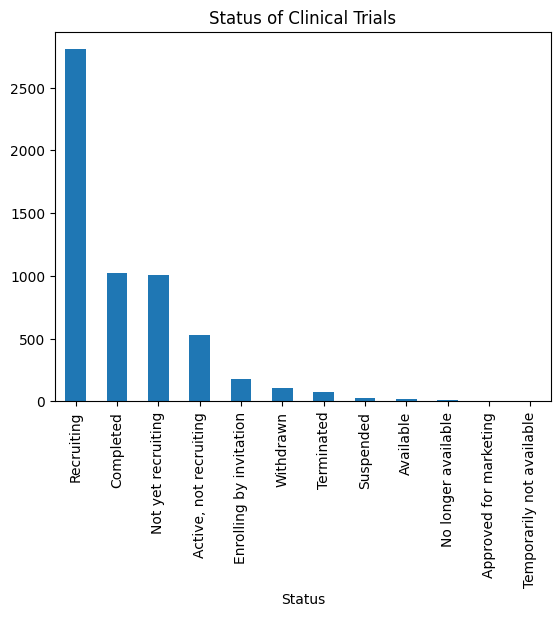

In [18]:
print(df['Status'].value_counts())
df['Status'].value_counts().plot(kind='bar', title='Status of Clinical Trials')

Phases
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Phases'}, xlabel='Phases'>

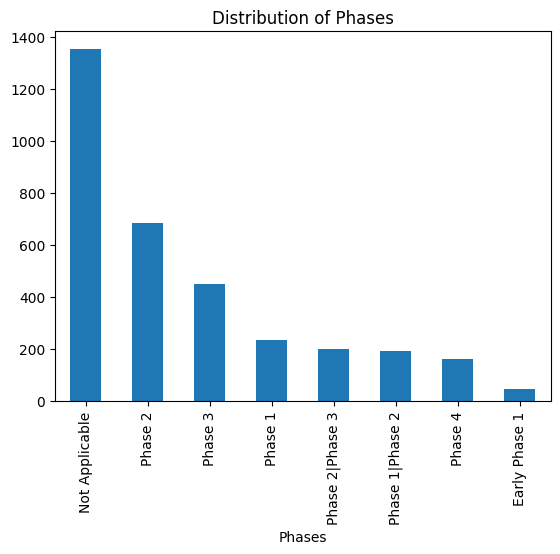

In [20]:
print(df['Phases'].value_counts())
df['Phases'].value_counts().plot(kind='bar',
title='Distribution of Phases')

Age
18 Years and older   (Adult, Older Adult)           2885
Child, Adult, Older Adult                            486
18 Years to 80 Years   (Adult, Older Adult)          221
18 Years to 65 Years   (Adult, Older Adult)          155
18 Years to 75 Years   (Adult, Older Adult)          135
                                                    ... 
15 Years to 45 Years   (Child, Adult)                  1
1 Month to 30 Years   (Child, Adult)                   1
21 Years to 40 Years   (Adult)                         1
11 Years and older   (Child, Adult, Older Adult)       1
8 Years to 20 Years   (Child, Adult)                   1
Name: count, Length: 417, dtype: int64


<Axes: title={'center': 'Age Group Distribution'}, xlabel='Age'>

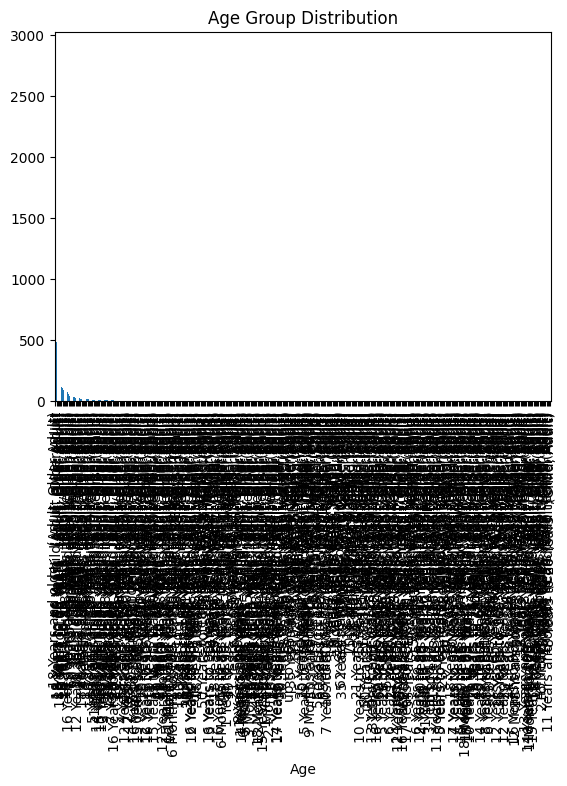

In [22]:
print(df['Age'].value_counts())
df['Age'].value_counts().plot(kind='bar', title='Age Group Distribution')

Phases                   Early Phase 1  Not Applicable  Phase 1  \
Status                                                            
Active, not recruiting               7             111       44   
Completed                            3             226       38   
Enrolling by invitation              4              54        1   
Not yet recruiting                   5             282       42   
Recruiting                          22             647       98   
Suspended                            2               2        0   
Terminated                           0              13        4   
Withdrawn                            3              19        7   

Phases                   Phase 1|Phase 2  Phase 2  Phase 2|Phase 3  Phase 3  \
Status                                                                        
Active, not recruiting                26       81               15       59   
Completed                             17       78               20       56   
Enrolling by 

<Axes: title={'center': 'Status vs. Phases'}, xlabel='Status'>

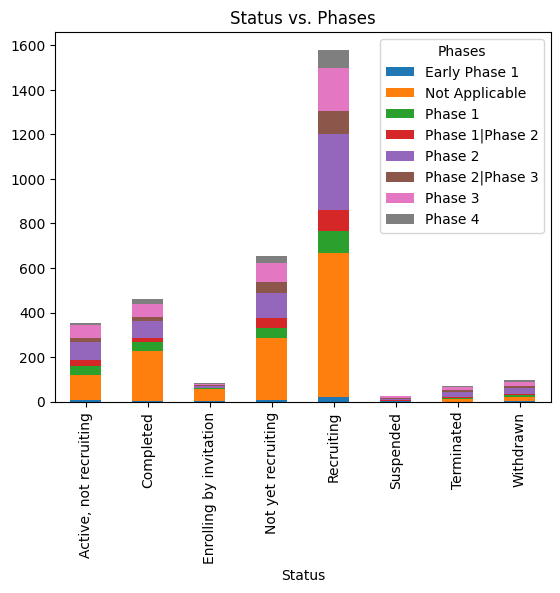

In [24]:
status_phase = pd.crosstab(df['Status'], df['Phases'])
print(status_phase)
status_phase.plot(kind='bar', stacked=True, title='Status vs. Phases')

In [27]:
conditions_outcomes = df.groupby('Conditions')['Outcome Measures'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
print(conditions_outcomes)

                                             Conditions  \
0                                2019 Novel Coronavirus   
1                      2019 Novel Coronavirus Infection   
2     2019 Novel Coronavirus Infection|COVID-19 Viru...   
3                      2019 Novel Coronavirus Pneumonia   
4             2019 Novel Coronavirus Pneumonia|COVID-19   
...                                                 ...   
3062                  the Lung Complication of COVID-19   
3063  the Prognostic Value of Ferritin|Glycosylated ...   
3064  the Study Focus on the Uses of Telephone and O...   
3065  the Use of Modern Technology Applications in H...   
3066  to Predict an Unfavorable Evolution of Covid-1...   

                                       Outcome Measures  
0     Proportion of participants who improve by at l...  
1     new-onset COVID-19|Number of Participants with...  
2     Number of participants with treatment emergent...  
3     Clinical recovery time|Complete fever time|Cou...  
4

In [30]:
# Convert date columns to datetime
# Convert date columns to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'],
errors='coerce')
df['Primary Completion Date'] = pd.to_datetime(df['Primary Completion Date'], errors='coerce')

<Axes: title={'center': 'Trials Started Over Time'}, xlabel='Start Date'>

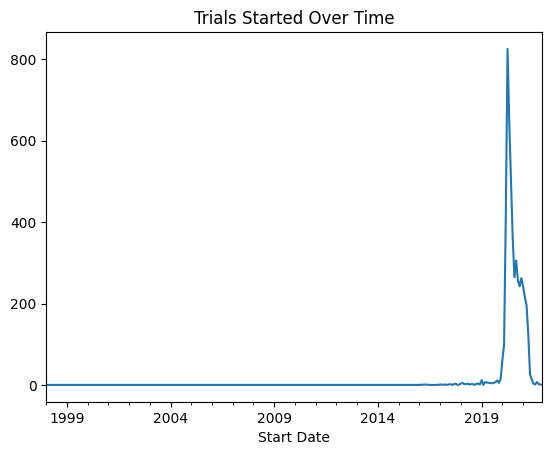

In [32]:
# Plot the number of trials started over time
df['Start Date'].dt.to_period('M').value_counts().sort_index().plot(kind=
'line', title='Trials Started Over Time')

In [33]:
# Save the cleaned data
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)

In [41]:
df . select_dtypes(exclude = 'object' ) . columns

Index(['Rank', 'Enrollment', 'Start Date', 'Primary Completion Date'], dtype='object')

In [43]:
# Detecting (Percentage) Missing Data
missing_data = df.isnull().mean() * 100
missing_data

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  8.991873
Primary Completion Date    25.280996
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
dtype: float64

In [97]:

def visualize_data(data, caption='', ylabel='Percentage of Mising Data'):
    # Set figure size
    sns.set(rc={'figure.figsize': (15, 8.27)})
    # Make ticks vertical
    plt.xticks(rotation=90)
    # Create the bar plot and set the title
    fig = sns.barplot(x=data.keys()[:min(40, len(data))].tolist(),
                      y=data.values[:min(40, len(data))].tolist()).set_title(caption)
    # Set labels
    plt.ylabel(ylabel)
    # Display the plot
    plt.show()

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

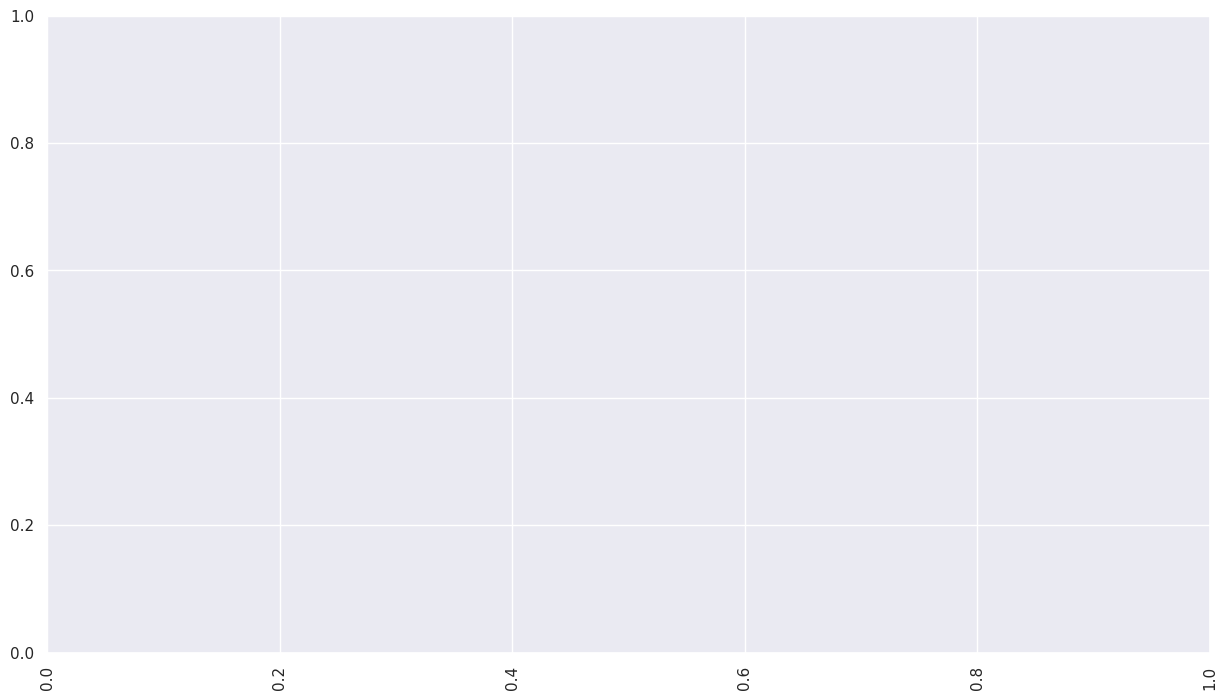

In [49]:
# set figure size
sns . set(rc = { 'figure.figsize' :( 15 , 8.27 )})
# make ticks vertical
plt . xticks(rotation = 90 )

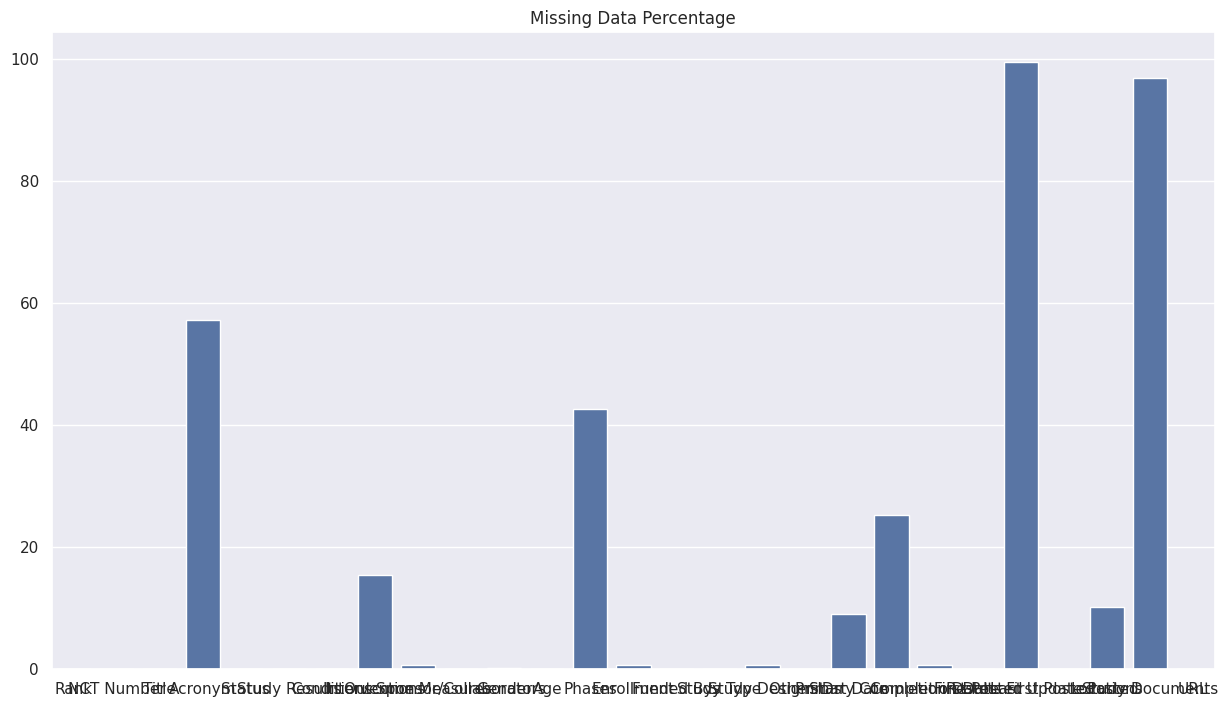

In [53]:
# set title to the image and plot it or the highest 40
fig = sns.barplot(x = missing_data.keys()[:min(40, len(missing_data))].tolist(), y = missing_data.values[:min(40, len(missing_data))].tolist()).set_title('Missing Data Percentage') # Assign a string value to caption directly within the set_title function

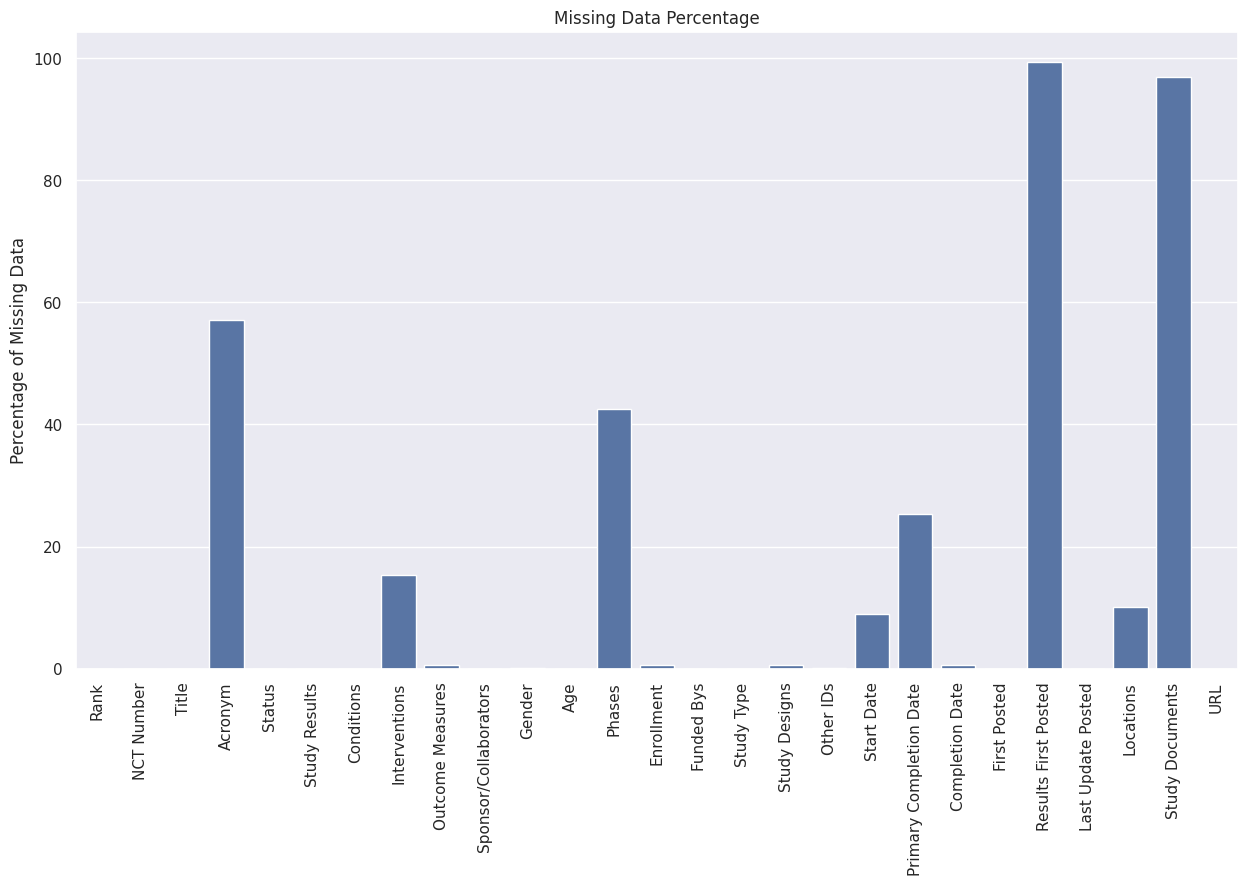

In [55]:
# set figure size
sns . set(rc = { 'figure.figsize' :( 15 , 8.27 )})
# make ticks vertical
plt . xticks(rotation = 90 )
# set title to the image and plot it or the highest 40
fig = sns.barplot(x = missing_data.keys()[:min(40, len(missing_data))].tolist(), y = missing_data.values[:min(40, len(missing_data))].tolist()).set_title('Missing Data Percentage') # Assign a string value to caption directly within the set_title function
# set labels
plt . ylabel('Percentage of Missing Data') # Directly provide the ylabel string
plt . show()

In [59]:
visualize_data(missing_data , 'Percentage of missing data in each feature' )

In [60]:
# Drop Study Documents and Results First Posted
df . drop([ 'Results First Posted' , 'Study Documents' ] , inplace = True , axis = 1 )

In [61]:
# Columns in the dataset after dropping Study Documents and Results First Posted
df . columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL'],
      dtype='object')

In [62]:
# Drop Duplicate Rows
print ( f"Shape before dropping duplicates data { df . shape } " )
df . drop_duplicates(inplace = True )
print ( f"Shape after dropping duplicates data { df . shape } " )


Shape before dropping duplicates data (5783, 25) 
Shape after dropping duplicates data (5783, 25) 


In [64]:
# Drop rows that have less than 10 non-null values
print ( f"Shape before dropping Null rows { df . shape } " )
# Remove how='any' to use thresh for dropping rows with less than 10 non-null values
df . dropna(axis = 0 , thresh = 10 , inplace = True )
print ( f"Shape after dropping Null rows { df . shape } " )

Shape before dropping Null rows (5783, 25) 
Shape after dropping Null rows (5783, 25) 


In [65]:
df . isnull() . mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  8.991873
Primary Completion Date    25.280996
Completion Date             0.622514
First Posted                0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
dtype: float64

In [67]:
# We can extract a new feature form The Location which is the country where the study hold
countries = [str(df.Locations.iloc[i]).split(',')[-1] for i in range(df.shape[0])]
df['Country'] = countries

In [68]:
df . columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Last Update Posted', 'Locations', 'URL', 'Country'],
      dtype='object')

In [69]:
df . Country . value_counts()[: 35 ]

Country
 United States          1267
 France                  647
nan                      585
 United Kingdom          306
 Italy                   235
 Spain                   234
 Turkey                  219
 Canada                  202
 Egypt                   192
 China                   171
 Brazil                  137
 Germany                 128
 Belgium                  91
 Mexico                   88
 Switzerland              76
 Russian Federation       69
 Sweden                   57
 Denmark                  56
 Israel                   56
 India                    55
 Pakistan                 53
 Argentina                47
 Netherlands              46
 Norway                   38
 Hong Kong                36
 Colombia                 33
 Republic of              31
 Austria                  29
 Poland                   29
 Singapore                29
 Saudi Arabia             27
 Australia                26
 Greece                   26
 Islamic Republic of      23
 South Africa             22
Name: count, dtype: int64

Now We need to clasify the missing data to one of these categories
1) Missing Completely At Random (MCAR)
2) Missing At Random (MAR)
3) Not Missing At Random (NMAR)

In [71]:
# Lets's start with Acronym
print ( f"Number of unique values is { df.Acronym.nunique() } \n " )
df.Acronym.value_counts()

Number of unique values is 2338 
 


Acronym
COVID-19        47
PROTECT          7
CORONA           6
RECOVER          5
SCOPE            5
                ..
ASD              1
VICO             1
LICORNE          1
LOSVID           1
MindMyMindFU     1
Name: count, Length: 2338, dtype: int64

In [73]:
# Find the realtion between null values in Acronym and Countries
(df . Acronym . isnull() . groupby(df . Country) . mean() . sort_values(ascending = False ) * 100 )[: 60 ]

Country
 Iraq                      100.000000
 Belarus                   100.000000
 Rwanda                    100.000000
 South Sudan               100.000000
 Cambodia                  100.000000
 Bulgaria                  100.000000
 Cyprus                    100.000000
 Bosnia and Herzegovina    100.000000
 Guinea-Bissau             100.000000
 Dominican Republic        100.000000
 Ecuador                   100.000000
 North Macedonia           100.000000
 Bahrain                   100.000000
 Azerbaijan                100.000000
 Uruguay                   100.000000
 Uzbekistan                100.000000
 Kyrgyzstan                100.000000
 Cape Verde                100.000000
 Republic of                96.774194
 Taiwan                     93.750000
 Singapore                  93.103448
 Japan                      88.888889
 Kuwait                     87.500000
 China                      87.134503
 Turkey                     86.757991
 Ukraine                    85.714286
 Malaysia                   84.615385
 Egypt                      83.854167
 Hungary                    83.333333
 Hong Kong                  80.555556
 Bangladesh                 80.000000
 India                      80.000000
 Kazakhstan                 80.000000
 Saudi Arabia               77.777778
 Puerto Rico                76.470588
 Israel                     75.000000
 Zimbabwe                   75.000000
 Jordan                     72.727273
 Poland                     72.413793
 Indonesia                  71.428571
 United States              69.376480
 Romania                    69.230769
 Kenya                      66.666667
 Nepal                      66.666667
 New Zealand                66.666667
 Ethiopia                   66.666667
 Slovakia                   66.666667
 Thailand                   66.666667
 Lebanon                    66.666667
nan                         66.324786
 Islamic Republic of        65.217391
 Russian Federation         65.217391
 Chile                      64.705882
 Austria                    62.068966
 Pakistan                   60.377358
 Brazil                     59.124088
 Mexico                     57.954545
 Sweden                     57.894737
 Argentina                  57.446809
 Canada                     55.940594
Name: Acronym, dtype: float64

● After inspecting the relation between the missing values in Acronym and Country we can conclude that there is a sort of relation between these two features, so we can say that Data is Missing At Random (MAR). ● So we can Impute by Missing Category.

In [74]:
# impute by a missing Indicator
df . Acronym = df . Acronym . fillna( "Missing Acronym" )

In [75]:
# Detecting (Percentage) Missing Data
df . isnull() . mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  8.991873
Primary Completion Date    25.280996
Completion Date             0.622514
First Posted                0.000000
Last Update Posted          0.000000
Locations                  10.115857
URL                         0.000000
Country                     0.000000
dtype: float64

In [76]:
# Impute Interventions , Phases , Locations by Missing Category
categorical_features = df . select_dtypes(include = object ) . columns
features = categorical_features[df[categorical_features] . isnull() . mean() > 0 ]
for feature in features: df[feature] = df[feature] . fillna( f"Missing { feature } " )

In [77]:
# Detecting (Percentage) Missing Data
df . isnull() . mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions               0.000000
Outcome Measures            0.000000
Sponsor/Collaborators       0.000000
Gender                      0.000000
Age                         0.000000
Phases                      0.000000
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.000000
Other IDs                   0.000000
Start Date                  8.991873
Primary Completion Date    25.280996
Completion Date             0.000000
First Posted                0.000000
Last Update Posted          0.000000
Locations                   0.000000
URL                         0.000000
Country                     0.000000
dtype: float64

In [78]:
# Check the skewness
df . Enrollment . skew()

34.06593382031148

<Axes: ylabel='Density'>

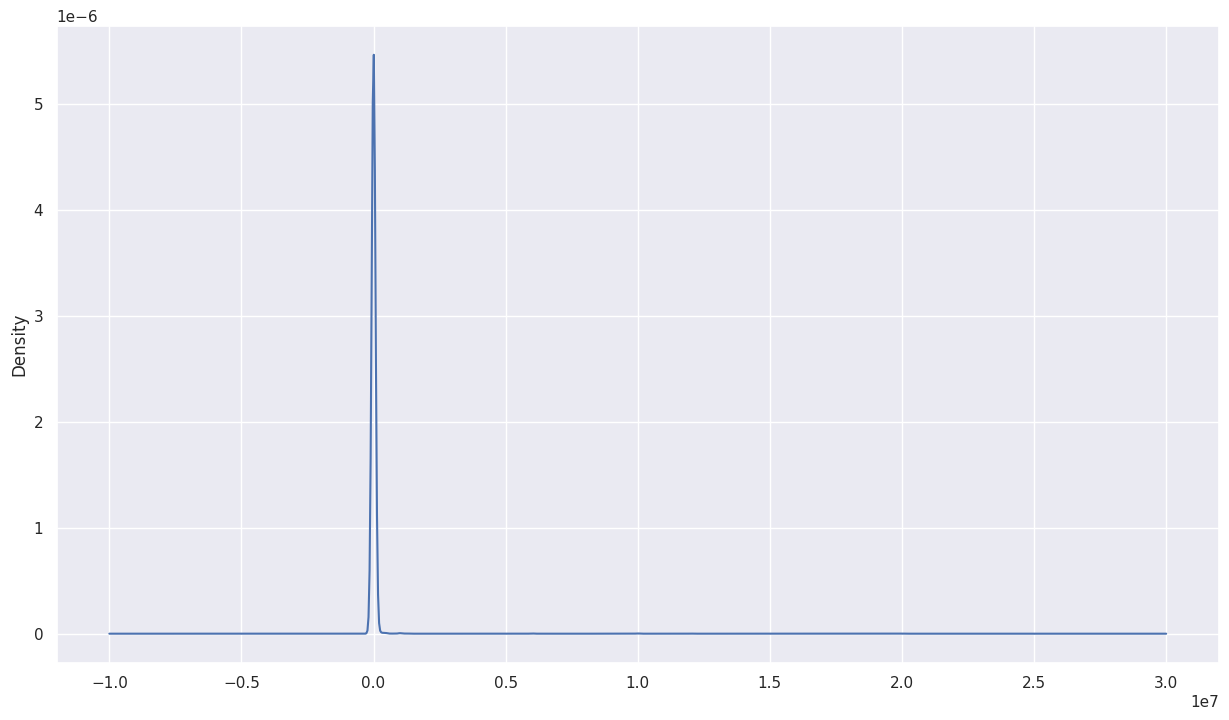

In [80]:
#the value of Skewness is 34 which means that we This feature isn't normally distributed
# Plotting the distribution of the enrollment
df.Enrollment.plot(kind='kde')

In [82]:
median_Value = df . Enrollment . median()
std_Value = df . Enrollment . std()
min_Value = df['Enrollment'].min()  # Calculate and assign min_Value
max_Value = df['Enrollment'].max()  # Calculate and assign max_Value
mean_Value = df['Enrollment'].mean()  # Calculate and assign mean_Value
print ( f"the min value is { min_Value } \n \ The max value is { max_Value } \n \ The mean is { mean_Value } \n \ The Median is { median_Value } \n \ Standard Devation is { std_Value } " )

the min value is 0.0 
 \ The max value is 20000000.0 
 \ The mean is 18319.48860671421 
 \ The Median is 170.0 
 \ Standard Devation is 404543.7287841073 


In [83]:
# Using Median to impute Missing Values
df . Enrollment = df . Enrollment . fillna(median_Value)

In [84]:
# Detecting (Percentage) Missing Data
df . isnull() . mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions               0.000000
Outcome Measures            0.000000
Sponsor/Collaborators       0.000000
Gender                      0.000000
Age                         0.000000
Phases                      0.000000
Enrollment                  0.000000
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.000000
Other IDs                   0.000000
Start Date                  8.991873
Primary Completion Date    25.280996
Completion Date             0.000000
First Posted                0.000000
Last Update Posted          0.000000
Locations                   0.000000
URL                         0.000000
Country                     0.000000
dtype: float64

In [85]:
# Detecting (Percentage) Missing Data
df . isnull() . mean() * 100

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                     0.000000
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions               0.000000
Outcome Measures            0.000000
Sponsor/Collaborators       0.000000
Gender                      0.000000
Age                         0.000000
Phases                      0.000000
Enrollment                  0.000000
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.000000
Other IDs                   0.000000
Start Date                  8.991873
Primary Completion Date    25.280996
Completion Date             0.000000
First Posted                0.000000
Last Update Posted          0.000000
Locations                   0.000000
URL                         0.000000
Country                     0.000000
dtype: float64

In [86]:
df . head()

Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Infection   
2                                            covid19   
3                                              COVID   
4  Maternal Fetal Infection Transmission|COVID-19...   

                                       Interventions  \
0   Diagnostic Test: ID Now™ COVID-19 Screening Test   
1    Drug: Drug COVID19-0001-USR|Drug: normal saline   
2  Other: Lung CT scan analysis in COVID-19 patients   
3          Diagnostic Test: COVID 19 Diagnostic Test   
4  Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...   

                                    Outcome Measures  \
0  Evaluate the diagnostic performance of the ID ...   
1  Change on viral load results from baseline aft...   
2  A qualitative analysis of parenchymal lung dam...   
3  Proportion of asymptomatic subjects|Proportion...   
4  COVID-19 by positive PCR in cord blood and / o...   

                               Sponsor/Collaborators  ...  \
0              Groupe Hospitalier Paris Saint Joseph  ...   
1                         United Medical Specialties  ...   
2                       University of Milano Bicocca  ...   
3                    Hong Kong Sanatorium & Hospital  ...   
4  Centre Hospitalier Régional d'Orléans|Centre d...  ...   

                                       Study Designs         Other IDs  \
0  Allocation: N/A|Intervention Model: Single Gro...       COVID-IDNow   
1  Allocation: Randomized|Intervention Model: Par...  COVID19-0001-USR   
2  Observational Model: Cohort|Time Perspective: ...       TAC-COVID19   
3  Observational Model: Cohort|Time Perspective: ...        RC-2020-08   
4  Observational Model: Cohort|Time Perspective: ...      CHRO-2020-10   

  Start Date  Primary Completion Date   Completion Date      First Posted  \
0 2020-11-09               2020-12-22    April 30, 2021     March 8, 2021   
1 2020-11-02               2020-12-15  January 29, 2021  October 20, 2020   
2 2020-05-07               2021-06-15     June 15, 2021      May 20, 2020   
3 2020-05-25               2020-07-31   August 31, 2020      June 4, 2020   
4 2020-05-05                      NaT          May 2021      May 20, 2020   

  Last Update Posted                                          Locations  \
0      March 8, 2021  Groupe Hospitalier Paris Saint-Joseph, Paris, ...   
1   October 20, 2020       Cimedical, Barranquilla, Atlantico, Colombia   
2   November 9, 2020  Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...   
3       June 4, 2020  Hong Kong Sanatorium & Hospital, Hong Kong, Ho...   
4       June 4, 2020                       CHR Orléans, Orléans, France   

                                           URL      Country  
0  https://ClinicalTrials.gov/show/NCT04785898       France  
1  https://ClinicalTrials.gov/show/NCT04595136     Colombia  
2  https://ClinicalTrials.gov/show/NCT04395482   San Marino  
3  https://ClinicalTrials.gov/show/NCT04416061    Hong Kong  
4  https://ClinicalTrials.gov/show/NCT04395924       France  

[5 rows x 26 columns]

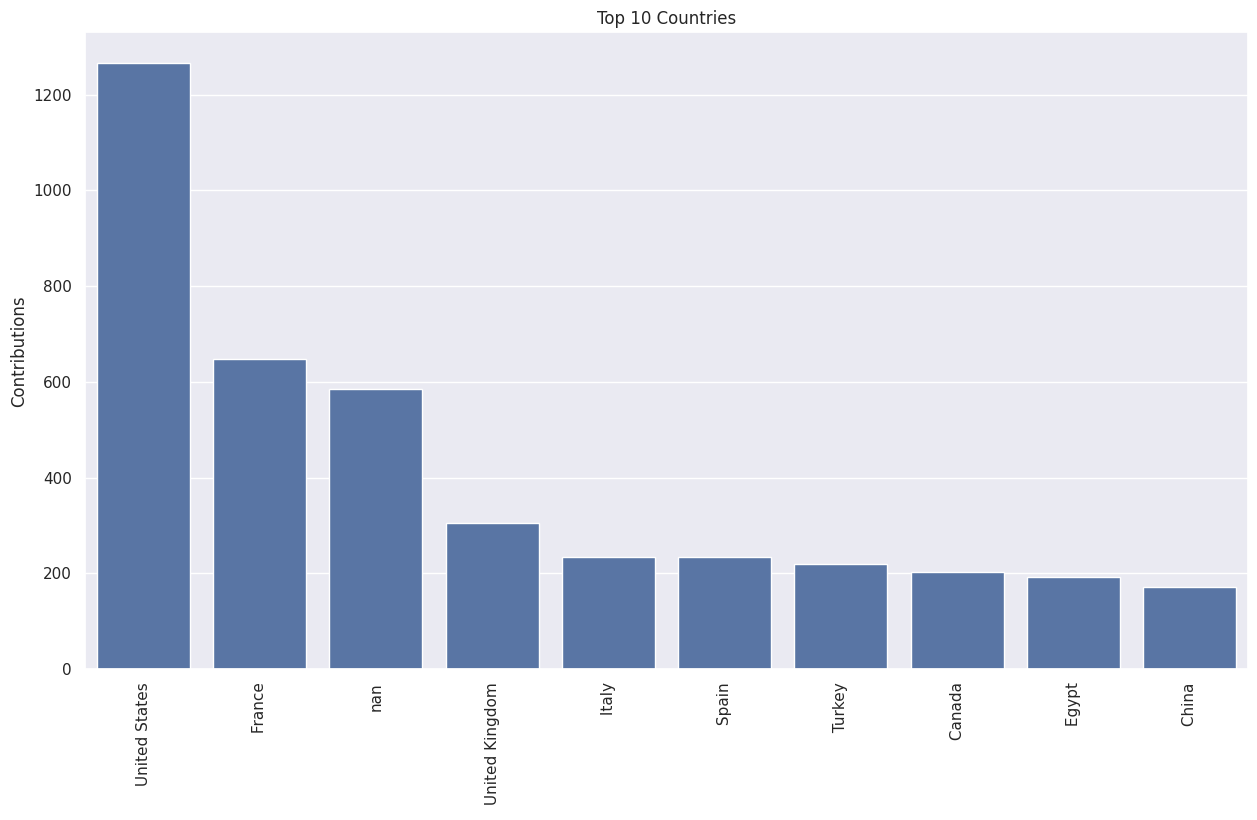

In [98]:
# Get Countires with highest Contributiuons
top_10_Countires = df . Country . value_counts()[: 10 ]
visualize_data(top_10_Countires , caption = 'Top 10 Countries' , ylabel = 'Contributions' ) # Remove the extra spaces or tabs before this line and add parentheses for function call

In [100]:
# Status of the Application
status = df . Status . value_counts()

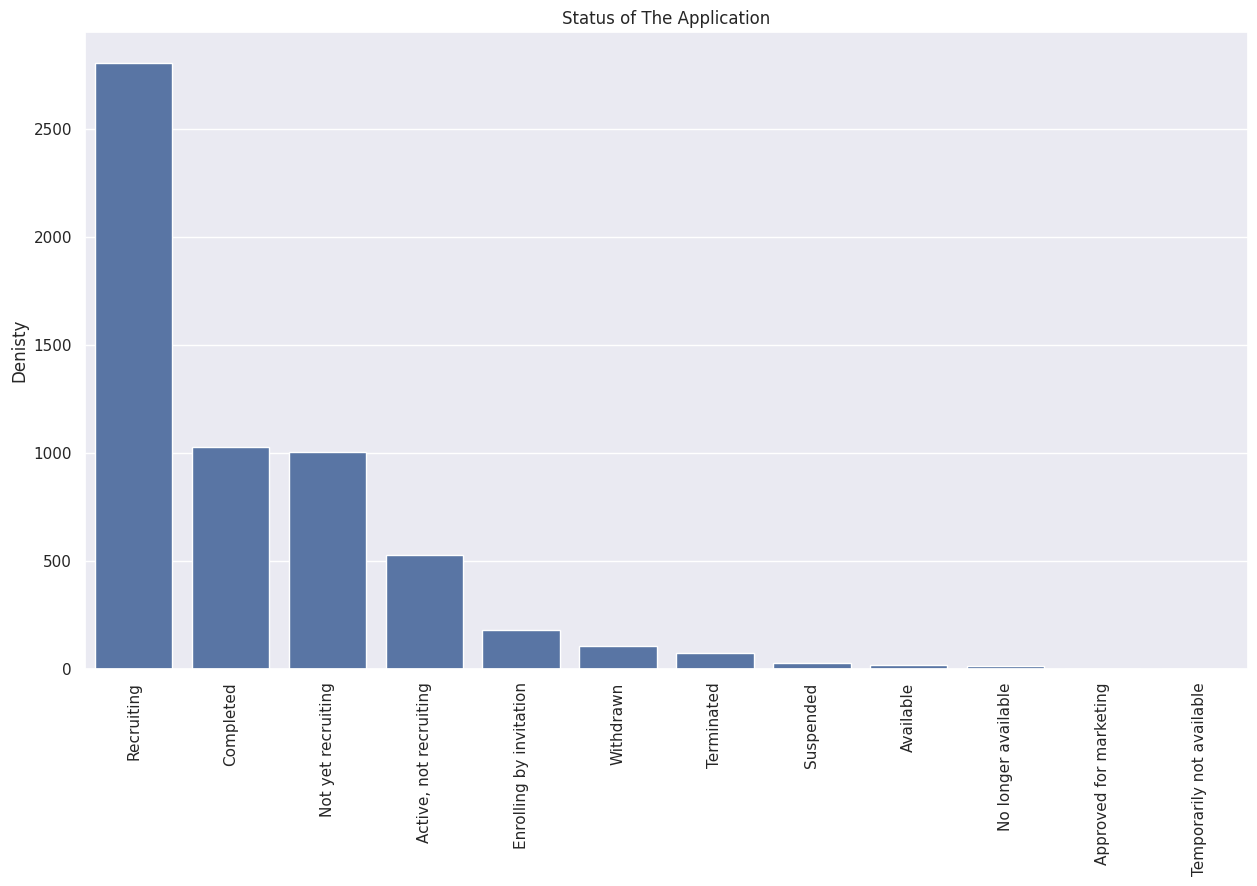

In [101]:
visualize_data(status , caption = 'Status of The Application' , ylabel = 'Denisty' )

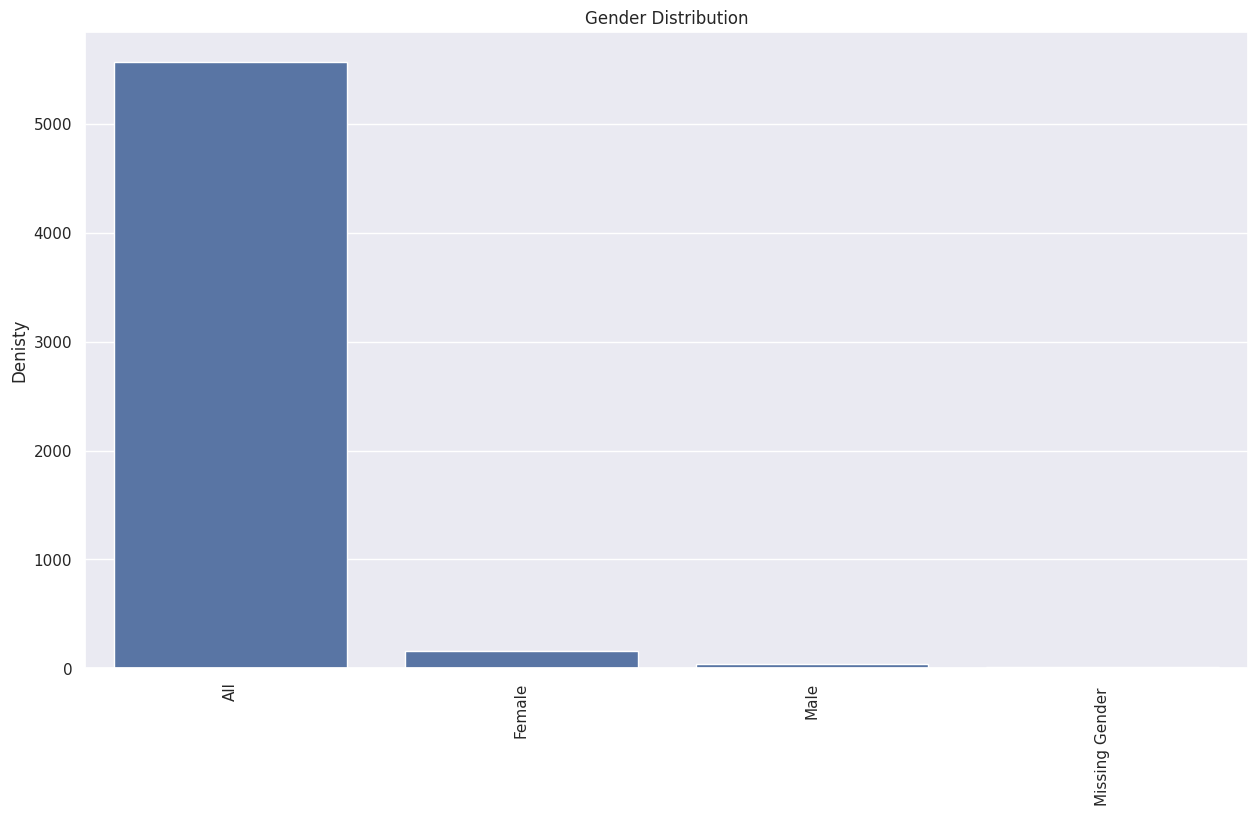

In [96]:
# Gender Visualiztions
gender = df . Gender . value_counts()
visualize_data(gender , caption = 'Gender Distribution' , ylabel = 'Denisty' )

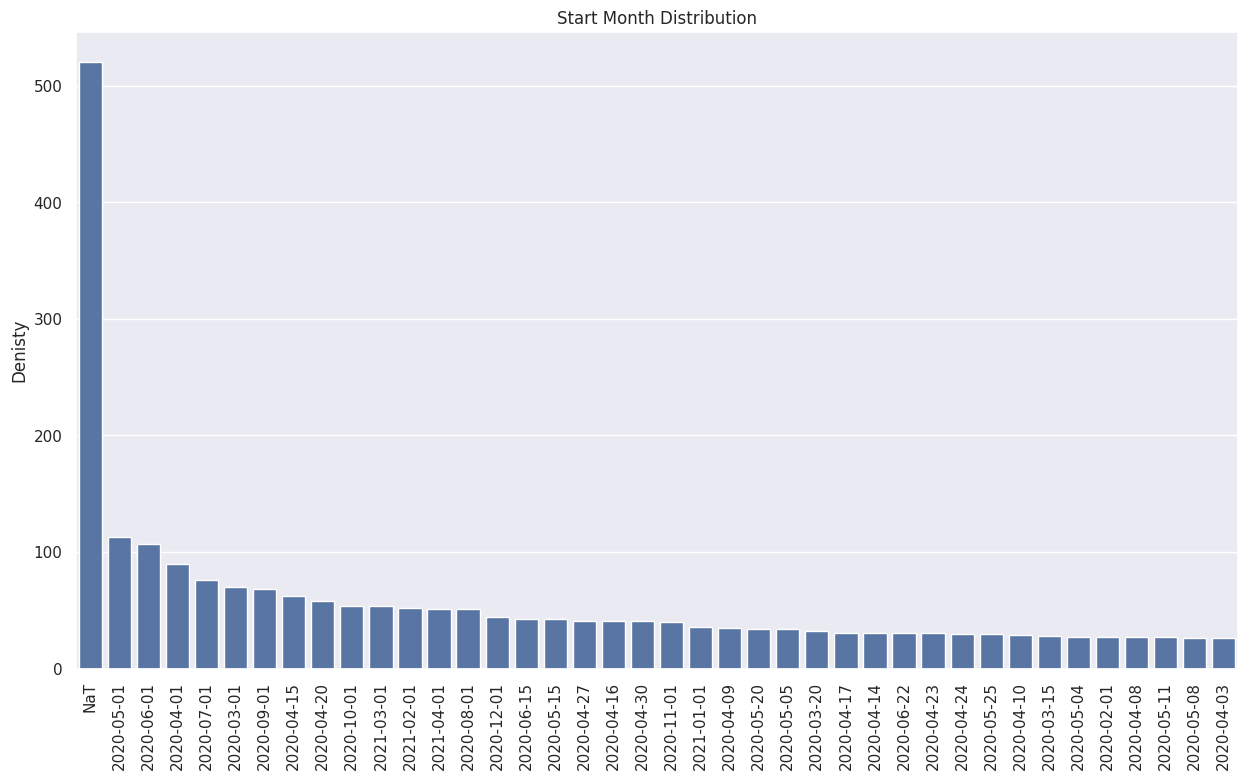

In [102]:
# Which month has the highest start
start_month = pd . Series([ str (df[ 'Start Date' ] . iloc[i]) . split( ' ' )[ 0 ] for i in range (df . shape[ 0 ])])
start_month_Distribution = start_month . value_counts()
visualize_data(start_month_Distribution , caption = 'Start Month Distribution' , ylabel = 'Denisty' )

In [103]:
print ( f"The shape of data frame is { df . shape } " )
print ( f"Nunique in NCT Number is { df[ 'NCT Number' ] . nunique() } " )
print ( f"Nunique in URL is { df . URL . nunique() } " )

The shape of data frame is (5783, 26) 
Nunique in NCT Number is 5783 
Nunique in URL is 5783 
